In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Upload the iris.data file
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

# Load the dataset into a DataFrame
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', header=None, names=columns)

# Display the first few rows
print("Dataset preview:")
print(df.head())


Saving iris.data to iris.data
Dataset preview:
   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [2]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for unique class labels
print("\nUnique classes in the dataset:")
print(df['Class'].unique())



Summary statistics:
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

Unique classes in the dataset:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
# Encode the class labels
df['Class'] = df['Class'].astype('category').cat.codes  # 0, 1, 2 for the three classes
print("\nEncoded Class column (first 5 rows):")
print(df.head())



Encoded Class column (first 5 rows):
   SepalLength  SepalWidth  PetalLength  PetalWidth  Class
0          5.1         3.5          1.4         0.2      0
1          4.9         3.0          1.4         0.2      0
2          4.7         3.2          1.3         0.2      0
3          4.6         3.1          1.5         0.2      0
4          5.0         3.6          1.4         0.2      0


In [4]:
# Separate features and target
X = df.iloc[:, :-1]  # Features: SepalLength, SepalWidth, PetalLength, PetalWidth
y = df.iloc[:, -1]   # Target: Class

# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("\nModel training complete.")



Model training complete.


In [5]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score:
1.0


In [8]:
# Test different kernels: 'linear', 'poly', 'rbf', 'sigmoid'
tuned_model = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))



Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



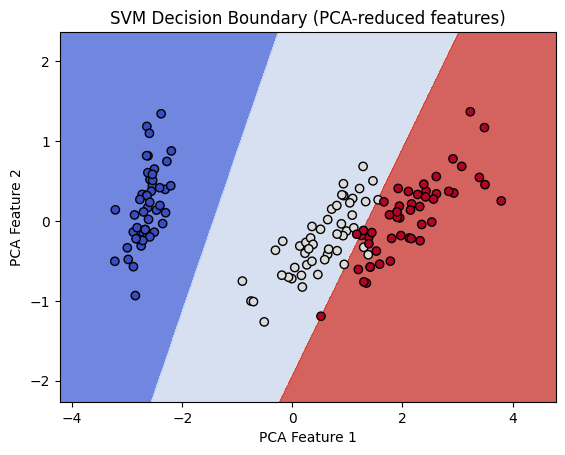

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting only the first two features for simplicity
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM on 2D reduced data
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_pca, y)

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('SVM Decision Boundary (PCA-reduced features)')
plt.show()


In [11]:
import pandas as pd

# Input new sample as a DataFrame with proper column names
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

# Predict the class
prediction = svm_model.predict(new_sample)
print(f"Predicted Class: {['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'][prediction[0]]}")


Predicted Class: Iris-setosa


In [12]:
import joblib

# Save the trained model
joblib.dump(svm_model, 'iris_svm_model.pkl')
print("Model saved as 'iris_svm_model.pkl'")

# Download the model file (if running on Google Colab)
from google.colab import files
files.download('iris_svm_model.pkl')


Model saved as 'iris_svm_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>